<a href="https://colab.research.google.com/github/dinsor17/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#เรียน 1 เมษา 2564

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
path = '/content/drive/My Drive/dataviz_2021_data'

In [4]:
file_path = '/content/drive/My Drive/dataviz_2021_data'
print(file_path)

/content/drive/My Drive/dataviz_2021_data


In [5]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


#เตรียมข้อมูล

#แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด detetime

In [6]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

#Bar chart (กราฟแท่ง)

สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อค้นหาร้านอาหารในแต่ละวัน

Quiz 6

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

ValueError: ignored

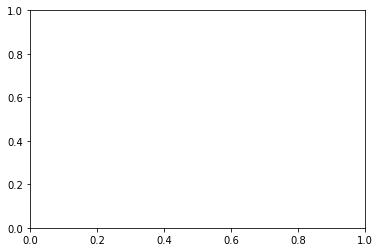

In [8]:
plt.bar([1,2,3,4,5,6,7],[[data['search_timestamp']]])

#เฉลย quiz6

In [9]:
data[data['search_timestamp'].dt.dayofweek == 0].shape[0]

1076297

In [10]:
from matplotlib import pyplot as plt

ส่วนประกอบของกราฟแท่ง


*   ตัวกราฟแท่ง (height)
*   ตำแหน่งกราฟแท่ง (x)
*   ชื่อแท่ง (tick_label)
*   ชื่อกราฟ (plt.title)
*   ชื่อแกน x (plt.xlabel)
*   ชื่อแกน y (plt.ylabel)



In [11]:
import matplotlib
matplotlib.__version__

'3.2.2'

การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [12]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [13]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

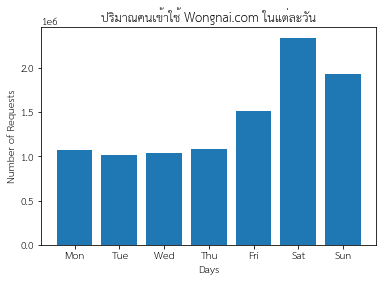

In [23]:
#bar chart ธรรมดา
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']) #ชื่อของแท่งแต่ละแท่ง
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว็บในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [24]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [25]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [17]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [18]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [19]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [20]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [21]:
import numpy as np

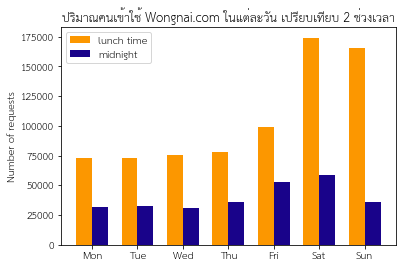

In [22]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')  #width = ขนาดของแท่ง
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

##แบบgroup ต่างจาก bar chart ธรรมดาตรงที่มีการเปรียบเทียบ

#เรียน 6 เม.ย 2564

https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

In [14]:
#ข้อดีของ Bar chart? กลับไปฟังคลิปสอนใหม่ 

##Stacked bar chart

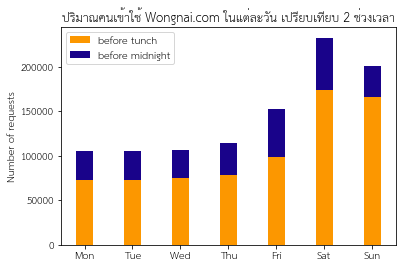

In [26]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width,  label='before tunch', color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight', color = '#19038a')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html?highlight=horizontal%20bar%20chart

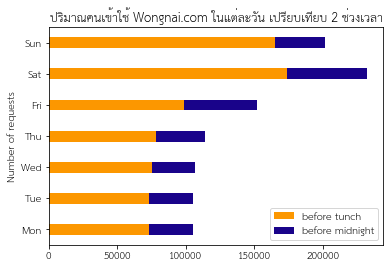

In [27]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width,  label='before tunch', color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight', color = '#19038a')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

##[เช็คชื่อ] โดยวาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย


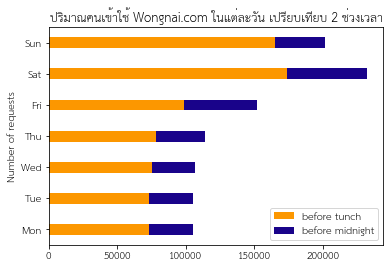

In [29]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width,  label='before tunch', color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight', color = '#19038a')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

##Histogram
กราฟแสดงความถี่

In [30]:
import numpy as np 
from matplotlib import  pyplot as plt 

In [31]:
#Fixing random stotae for reproducibility
np.random.seed(2021)

In [32]:
np.random.randint(100)

85

In [33]:
np.random.random(100) # mu = 0 std = 

array([0.73336936, 0.13894716, 0.31267308, 0.99724328, 0.12816238,
       0.17899311, 0.75292543, 0.66216051, 0.78431013, 0.0968944 ,
       0.05857129, 0.96239599, 0.61655744, 0.08662996, 0.56127236,
       0.61652471, 0.96384302, 0.57430429, 0.37116085, 0.45214524,
       0.20185025, 0.56930512, 0.19509597, 0.58370402, 0.47631347,
       0.5178144 , 0.82309863, 0.73222503, 0.06905627, 0.67212894,
       0.64348481, 0.82801437, 0.20446939, 0.61748895, 0.61770101,
       0.30106862, 0.87174059, 0.58965408, 0.98177009, 0.44223223,
       0.12631769, 0.5088309 , 0.43178618, 0.91593956, 0.70901564,
       0.89065539, 0.58888561, 0.63682992, 0.34220894, 0.82379118,
       0.30515077, 0.30754347, 0.20132266, 0.26516495, 0.65092375,
       0.15461481, 0.3886995 , 0.64761414, 0.84829912, 0.0638365 ,
       0.41444118, 0.33224425, 0.72132098, 0.4738473 , 0.79864134,
       0.0908669 , 0.87455682, 0.77697686, 0.77156642, 0.06310333,
       0.59443848, 0.79249473, 0.27413368, 0.37101981, 0.85311

In [34]:
mu, sigma = 100, 15 
X = mu + sigma * np.random.randn(10000)

In [35]:
X

array([ 99.44111431, 105.63938902, 100.97987257, ..., 100.66135783,
        79.98658993, 118.39927543])

ข้อดีของ Histogram คือ 

- สามารถไปดูค่าที่คำนวณมาได้ว่าแต่ละปีมันเท่าไร โดยที่ไม่ต้องไปนับเอง

- ช่วยนับสมาชิกให้เรา

Histogram มันเป็นการแสดงความถี่

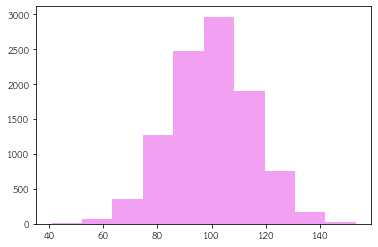

In [36]:
output = plt.hist(X, 10, facecolor = 'violet', alpha = 0.75);

In [37]:
output

(array([  13.,   70.,  351., 1269., 2477., 2968., 1898.,  753.,  172.,
          29.]), array([ 40.88463603,  52.13062451,  63.376613  ,  74.62260148,
         85.86858997,  97.11457845, 108.36056694, 119.60655543,
        130.85254391, 142.0985324 , 153.34452088]), <a list of 10 Patch objects>)

##Plot histogram ของ number_of_result	 ข้อมูล search_request.csv

In [38]:
data['number_of_result']

0           18
1           10
2            8
3           12
4           14
            ..
10004352    22
10004353    22
10004354    22
10004355    22
10004356    22
Name: number_of_result, Length: 10004357, dtype: object

In [39]:
data[data['number_of_result'] == 'number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


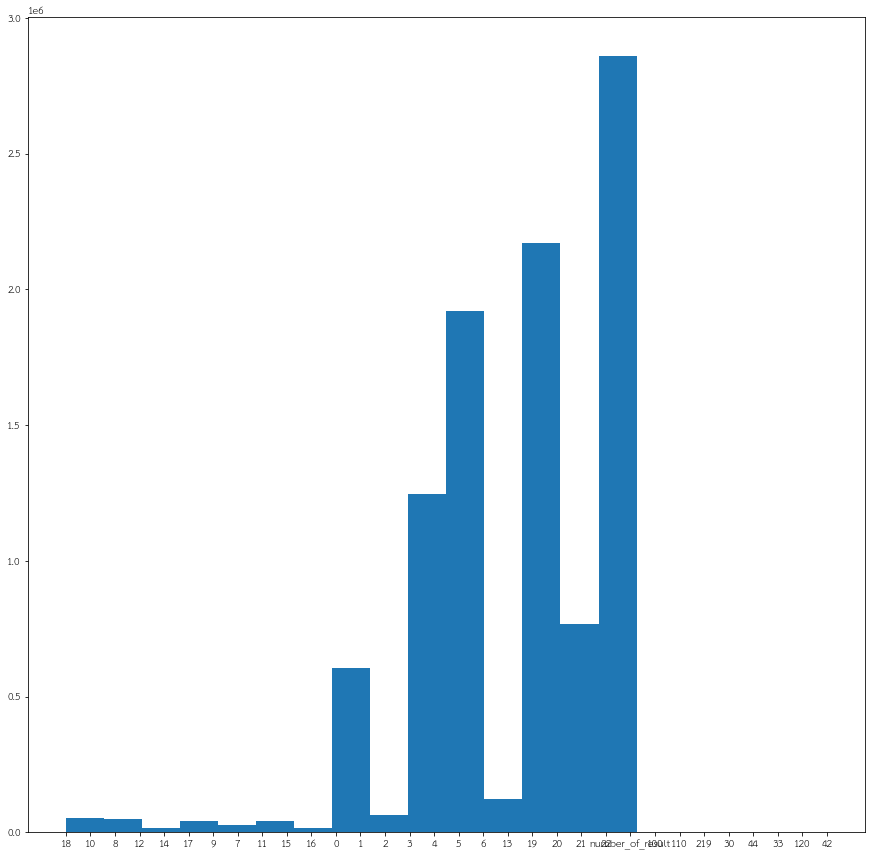

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,15]
hist_res = plt.hist(list(data['number_of_result']),20)

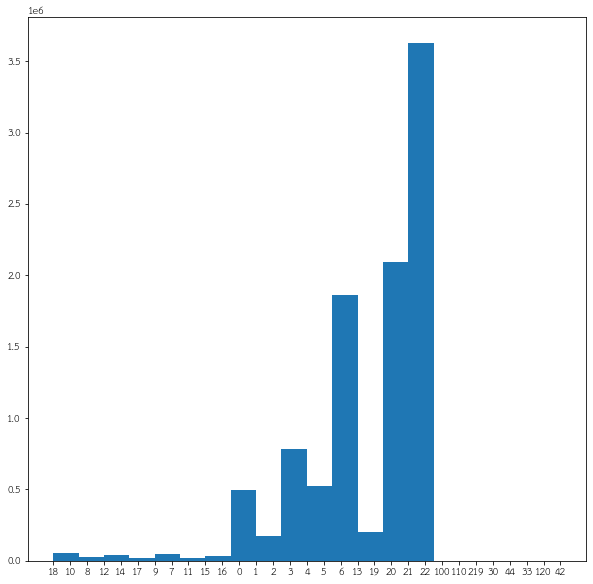

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,10]
hist_res = plt.hist(list(data['number_of_result'].drop(1000016)),20)

# เรียน 8 เมษา 2564

Histogram รอบ 2 
Histogram เป็นกราฟแสดงความถี่ของข้อมูล

แก้ไข แกน X ที่เรียงข้อมูล (เพราะที่ทำไปคาบก่อนตัวเลขในแกน x มันไม่เรียง)

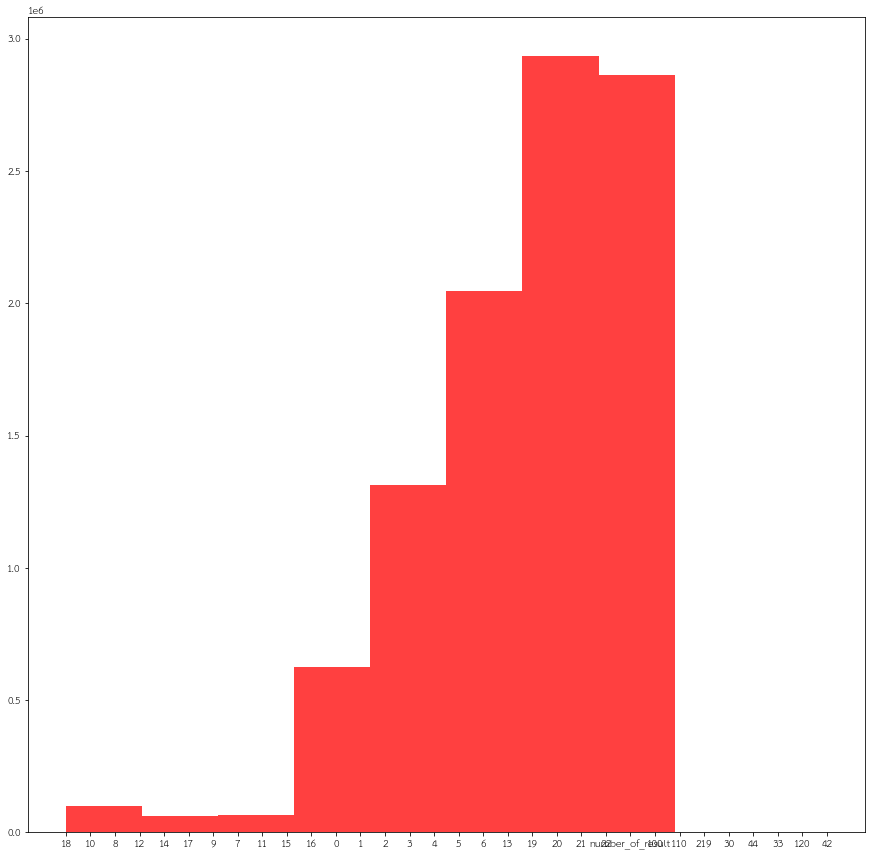

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor='red' ,alpha = 0.75)

In [28]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

In [42]:
#จากโค้ดด้านบนเราจะเห็นว่ามันยังเป็น  float อยู่
type(data['number_of_result'][0]) 
#จะเห็นว่ามันรันเป็น int แต่มันจะต้องมีตัวที่ยังไม่เป็น int แน่นอน

int

ตรวจสอบ data type ของตัวแปร

In [43]:
type(data['number_of_result'][0])  == int 

True

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')

In [47]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

In [48]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [49]:
data = data.drop(1000016)

In [50]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [51]:
new_type = data['number_of_result'].astype('int32')

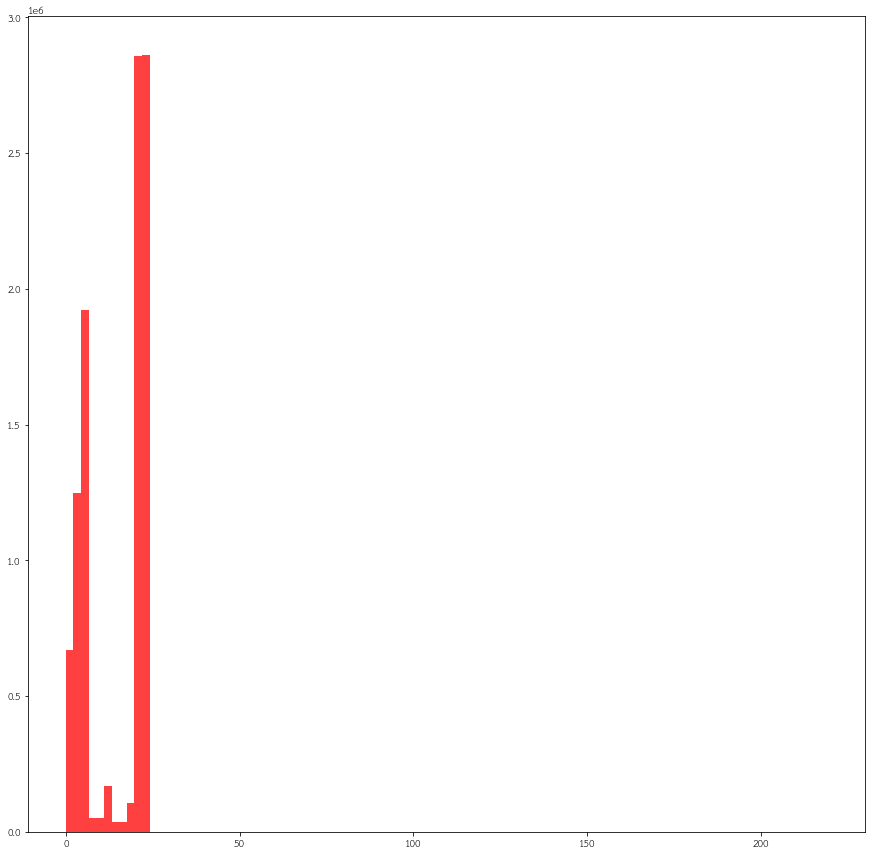

In [52]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [53]:
new_type_nooutlier = new_type[new_type < 25]

In [54]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

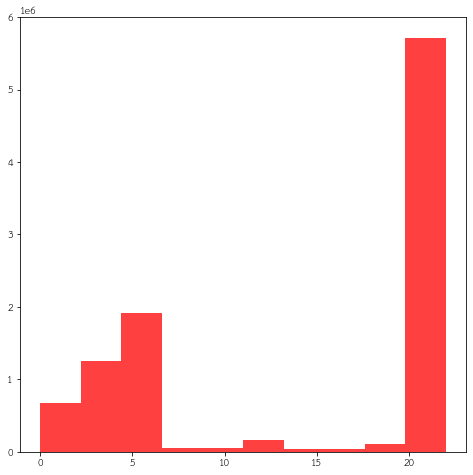

In [56]:
matplotlib.rcParams['figure.figsize'] = [8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับเเท่งอื่นๆรวมกัน

In [58]:
new_type_nooutlier = new_type_nooutlier.sum()
new_type_nooutlier

142831765